In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

# H6.1

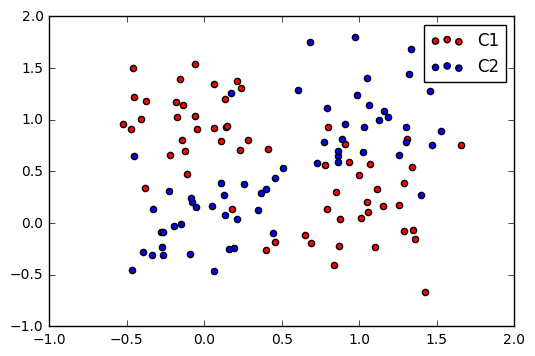

In [60]:
def generateTraining():
    variance = 0.1
    sigma = np.sqrt(variance)
    no_sample_per_class = 60
    classes = [-1,1]
    total_samples = len(classes)*no_sample_per_class
    
    x = np.concatenate((
            np.random.normal( 0, sigma, 30), # x1 for u1
            np.random.normal( 1, sigma, 30),  # x1 for u2
            np.random.normal( 0, sigma, 30),  # x1 for u3
            np.random.normal( 1, sigma, 30),  # x1 for u4
            
            np.random.normal( 1, sigma, 30),  # x2 for u1
            np.random.normal( 0, sigma, 30),  # x2 for u2
            np.random.normal( 0, sigma, 30),  # x2 for u3
            np.random.normal( 1, sigma, 30),  # x2 for u4
        ))
    x = x.reshape(2,total_samples)
    y = np.zeros(total_samples)
    y[:no_sample_per_class] = -1
    y[no_sample_per_class:] = 1
    return (x, y)

def mapColor(y):
    return [ 'r' if l == -1 else 'b' for l in y ]

def plotScatter(x,y):
    plt.scatter( x[0,:60] , x[1,:60], c='r', label="C1" )
    plt.scatter( x[0,60:] , x[1,60:], c='b', label="C2" )
    plt.legend()

training_x, training_y = generateTraining()

plotScatter(training_x, training_y)

# H6.2

In [61]:
def knn(x, y, point, k=3):
    point = np.array(point)
    no_training = x.shape[1]
    dist = np.zeros(no_training)
    for i in range(no_training):
        dist[i] = np.linalg.norm( np.array(x[:,i])-point )
    
    sorted_dist = np.argsort(dist)
    
    nearest_neightbors = sorted_dist[:k]
    
    v_c1 = 0
    for n in nearest_neightbors:
#         print(y[n])
        if y[n] ==  1:
            v_c1 = v_c1+1
    
    p_c1 = v_c1*1.0/k
#     print(p_c1)
    pred = -1
    if p_c1 > 0.5 :
        pred = 1

    diff = np.abs(1-2*p_c1)
    return (pred, diff, pred*diff )
    
knn(training_x, training_y, (0.5,0.5), k=3)

(1, 1.0, 1.0)

# H6.3

In [83]:
def predict_knn(train_x, train_y, x, k=3):
    size = x.shape[1];

    pred = np.zeros(size)
    ci   = np.zeros(size)
    for i in range(size):
        res = knn(train_x, train_y, (x[0, i], x[1,i]), k)
        pred[i] = res[0]
        ci[i] = res[1]
        
    return (pred,ci )


h = 0.02
x_min, x_max = training_x[0,:].min() - 0.5, training_x[0,:].max() + 0.5
y_min, y_max = training_x[1,:].min() - 0.5, training_x[1,:].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xx_r = xx.ravel()
yy_r = yy.ravel()
    
xx_yy = np.concatenate((xx_r, yy_r)).reshape( (2,len(xx_r)) )
(pred_1nn, _ ) = predict_knn( training_x, training_y, xx_yy, 1 )

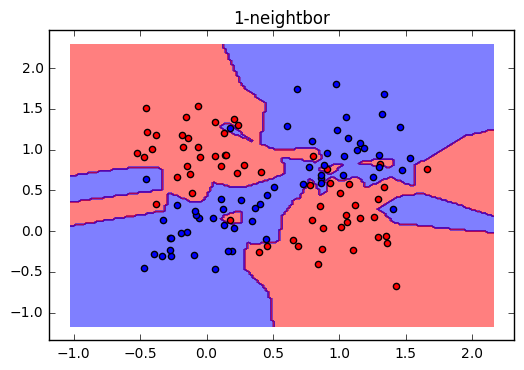

In [87]:
def plotContour( x, pred, title ):
    Z = pred.reshape(xx.shape)

    levels = [-1, -0.5, 0, 0.5, 1]
    plt.contourf(xx, yy, Z,  colors=('r','b'), alpha=0.5)
    plt.scatter( x[0,:60] , x[1,:60], c='r', label="C1" )
    plt.scatter( x[0,60:] , x[1,60:], c='b', label="C2" )
    plt.title(title)

plotContour( training_x, pred_1nn, "1-neightbor")

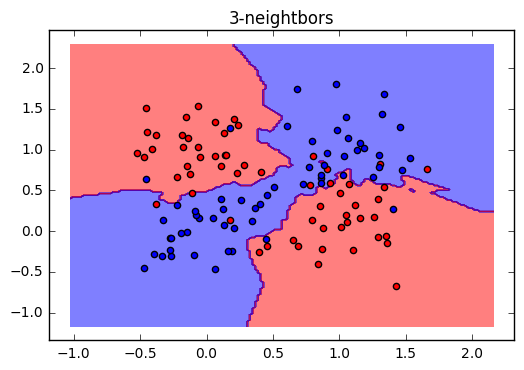

In [89]:
(pred_3nn, _ ) = predict_knn( training_x, training_y, xx_yy, 3 )
plotContour( training_x, pred_3nn, "3-neightbors")

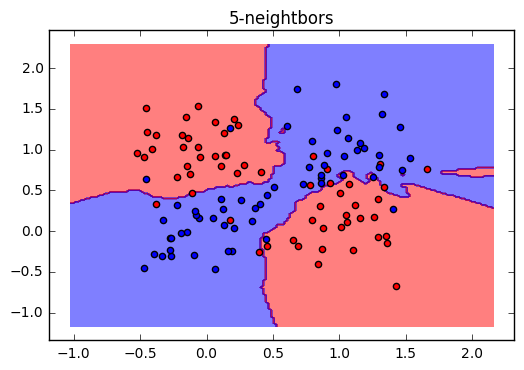

In [90]:
(pred_5nn, _ ) = predict_knn( training_x, training_y, xx_yy, 5 )
plotContour( training_x, pred_5nn, "5-neightbors")

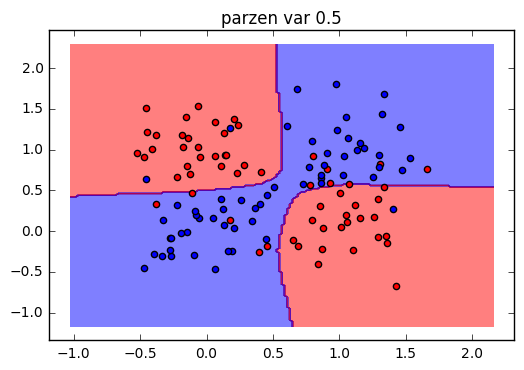

In [133]:
def pred_parzen(x, y, points, var ):
    no_training = x.shape[1]
    no_points = points.shape[1]

    hot_y = np.zeros( (2,no_training) )
    for i in range(no_training):
        if( y[i] == -1):
            hot_y[0,i] = 1 # set the 1st row to be 1 if C1
        else:
            hot_y[1,i] = 1 # set the 2nd row to be 1 if C2
    
    pred = np.ones(no_points)
    for i in range(no_points):
        diff = x - points[:,i].reshape((2,1))
        norms = np.linalg.norm( diff, axis=0 )
        ks = np.exp( (-1/(2*var))* norms )
        votes = np.multiply( ks, hot_y)
        total_dist = np.sum(votes)
        p = np.sum(votes,axis=1)/total_dist
        if( p[0] > p[1] ):
            pred[i] = -1
    return pred

pred_parzen05 = pred_parzen(training_x, training_y, xx_yy, 0.5)
plotContour( training_x, pred_parzen05, "parzen var 0.5")

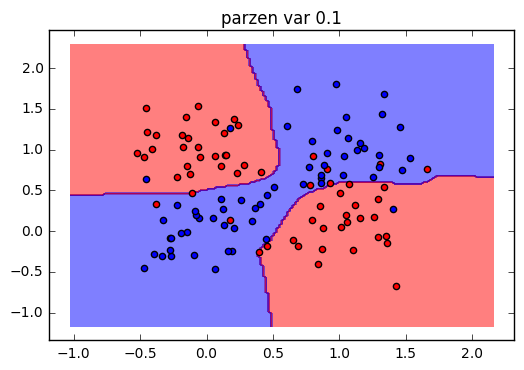

In [134]:
pred_parzen01 = pred_parzen(training_x, training_y, xx_yy, 0.1)
plotContour( training_x, pred_parzen01, "parzen var 0.1")

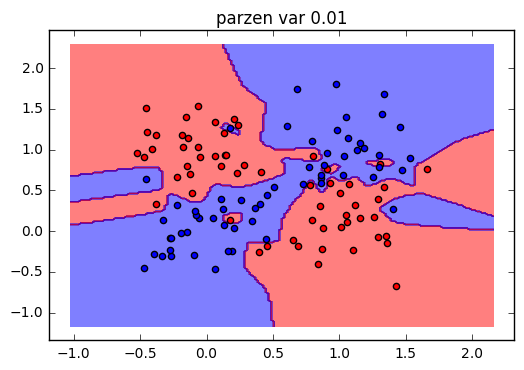

In [135]:
pred_parzen001 = pred_parzen(training_x, training_y, xx_yy, 0.01)
plotContour( training_x, pred_parzen001, "parzen var 0.01")